In [1]:
import numpy as np
from numpy import mean,std
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

In [2]:
df = pd.read_csv('Airline_data_updated.csv')

In [3]:
df.head(10)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,Delays
0,1994,10,5,3,955,955,1022,1008,HP,87,73,0,14,0,ABQ,PHX,328,1
1,1994,6,23,4,2019,1950,2019,1945,WN,60,55,0,34,29,DTW,MDW,229,1
2,1994,11,18,5,1819,1815,2117,2120,DL,238,245,0,-3,4,JFK,DFW,1391,1
3,1994,6,25,6,1906,1900,2053,2045,WN,107,105,0,8,6,HOU,BNA,670,1
4,1994,10,20,4,958,957,1057,1103,AA,119,126,0,-6,1,PHL,ORD,678,1
5,1994,1,4,2,1047,1001,1236,1140,TW,109,99,0,56,46,ATL,PBI,545,1
6,1994,9,25,7,1733,1730,1850,1855,US,77,85,0,-5,3,CLE,LGA,418,1
7,1994,11,19,6,1009,1010,1222,1233,US,133,143,0,-11,-1,BWI,TPA,842,0
8,1994,7,7,4,1856,1845,2020,2003,TW,84,78,0,17,11,STL,OMA,342,1
9,1994,2,15,2,657,700,846,854,UA,109,114,0,-8,-3,BHM,ORD,584,0


In [4]:
df['Year'] == 2008

0       False
1       False
2       False
3       False
4       False
        ...  
5995     True
5996     True
5997     True
5998     True
5999     True
Name: Year, Length: 6000, dtype: bool

In [8]:
from sklearn.feature_extraction import FeatureHasher
fh = FeatureHasher(n_features=2, input_type='string')
hashed_features = fh.fit_transform(df['UniqueCarrier'])
hashed_features = hashed_features.toarray()
df = pd.concat([df, pd.DataFrame(hashed_features)], 
          axis=1)

In [9]:
df.rename(columns={0:"UniqueCarrier_N_0",1:"UniqueCarrier_N_1"}, inplace=True)
df.drop(columns='UniqueCarrier', inplace=True)

In [10]:
df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,Delays,UniqueCarrier_N_0,UniqueCarrier_N_1
0,1994,10,5,3,955,955,1022,1008,87,73,0,14,0,ABQ,PHX,328,1,0.0,0.0
1,1994,6,23,4,2019,1950,2019,1945,60,55,0,34,29,DTW,MDW,229,1,-1.0,-1.0
2,1994,11,18,5,1819,1815,2117,2120,238,245,0,-3,4,JFK,DFW,1391,1,1.0,-1.0
3,1994,6,25,6,1906,1900,2053,2045,107,105,0,8,6,HOU,BNA,670,1,-1.0,-1.0
4,1994,10,20,4,958,957,1057,1103,119,126,0,-6,1,PHL,ORD,678,1,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,2008,1,8,2,1014,1013,1319,1323,125,130,107,-4,1,DEN,SAT,794,1,0.0,0.0
5996,2008,3,4,2,1815,1810,2221,2140,186,150,143,41,5,STL,BOS,1046,1,2.0,0.0
5997,2008,4,5,6,2008,2000,2234,2220,266,260,241,14,8,ORD,SEA,1721,1,0.0,0.0
5998,2008,4,22,2,1456,1500,1621,1620,85,80,60,1,-4,DFW,BTR,383,1,1.0,1.0


In [11]:
hashed_features = fh.fit_transform(df['Origin'])
hashed_features = hashed_features.toarray()
df = pd.concat([df, pd.DataFrame(hashed_features)], 
          axis=1)

In [12]:
df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,...,ArrDelay,DepDelay,Origin,Dest,Distance,Delays,UniqueCarrier_N_0,UniqueCarrier_N_1,0,1
0,1994,10,5,3,955,955,1022,1008,87,73,...,14,0,ABQ,PHX,328,1,0.0,0.0,0.0,1.0
1,1994,6,23,4,2019,1950,2019,1945,60,55,...,34,29,DTW,MDW,229,1,-1.0,-1.0,0.0,-1.0
2,1994,11,18,5,1819,1815,2117,2120,238,245,...,-3,4,JFK,DFW,1391,1,1.0,-1.0,-2.0,1.0
3,1994,6,25,6,1906,1900,2053,2045,107,105,...,8,6,HOU,BNA,670,1,-1.0,-1.0,0.0,1.0
4,1994,10,20,4,958,957,1057,1103,119,126,...,-6,1,PHL,ORD,678,1,2.0,0.0,0.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,2008,1,8,2,1014,1013,1319,1323,125,130,...,-4,1,DEN,SAT,794,1,0.0,0.0,1.0,0.0
5996,2008,3,4,2,1815,1810,2221,2140,186,150,...,41,5,STL,BOS,1046,1,2.0,0.0,-1.0,-2.0
5997,2008,4,5,6,2008,2000,2234,2220,266,260,...,14,8,ORD,SEA,1721,1,0.0,0.0,2.0,1.0
5998,2008,4,22,2,1456,1500,1621,1620,85,80,...,1,-4,DFW,BTR,383,1,1.0,1.0,-1.0,0.0


In [13]:
df.rename(columns={0:"Origin_N_0",1:"Origin_N_1"}, inplace=True)
df.drop(columns='Origin', inplace=True)

In [14]:
df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Dest,Distance,Delays,UniqueCarrier_N_0,UniqueCarrier_N_1,Origin_N_0,Origin_N_1
0,1994,10,5,3,955,955,1022,1008,87,73,0,14,0,PHX,328,1,0.0,0.0,0.0,1.0
1,1994,6,23,4,2019,1950,2019,1945,60,55,0,34,29,MDW,229,1,-1.0,-1.0,0.0,-1.0
2,1994,11,18,5,1819,1815,2117,2120,238,245,0,-3,4,DFW,1391,1,1.0,-1.0,-2.0,1.0
3,1994,6,25,6,1906,1900,2053,2045,107,105,0,8,6,BNA,670,1,-1.0,-1.0,0.0,1.0
4,1994,10,20,4,958,957,1057,1103,119,126,0,-6,1,ORD,678,1,2.0,0.0,0.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,2008,1,8,2,1014,1013,1319,1323,125,130,107,-4,1,SAT,794,1,0.0,0.0,1.0,0.0
5996,2008,3,4,2,1815,1810,2221,2140,186,150,143,41,5,BOS,1046,1,2.0,0.0,-1.0,-2.0
5997,2008,4,5,6,2008,2000,2234,2220,266,260,241,14,8,SEA,1721,1,0.0,0.0,2.0,1.0
5998,2008,4,22,2,1456,1500,1621,1620,85,80,60,1,-4,BTR,383,1,1.0,1.0,-1.0,0.0


In [15]:
hashed_features = fh.fit_transform(df['Dest'])
hashed_features = hashed_features.toarray()
df = pd.concat([df, pd.DataFrame(hashed_features)], 
          axis=1)

In [16]:
df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,...,DepDelay,Dest,Distance,Delays,UniqueCarrier_N_0,UniqueCarrier_N_1,Origin_N_0,Origin_N_1,0,1
0,1994,10,5,3,955,955,1022,1008,87,73,...,0,PHX,328,1,0.0,0.0,0.0,1.0,1.0,0.0
1,1994,6,23,4,2019,1950,2019,1945,60,55,...,29,MDW,229,1,-1.0,-1.0,0.0,-1.0,1.0,0.0
2,1994,11,18,5,1819,1815,2117,2120,238,245,...,4,DFW,1391,1,1.0,-1.0,-2.0,1.0,-1.0,0.0
3,1994,6,25,6,1906,1900,2053,2045,107,105,...,6,BNA,670,1,-1.0,-1.0,0.0,1.0,0.0,-1.0
4,1994,10,20,4,958,957,1057,1103,119,126,...,1,ORD,678,1,2.0,0.0,0.0,-1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,2008,1,8,2,1014,1013,1319,1323,125,130,...,1,SAT,794,1,0.0,0.0,1.0,0.0,0.0,-1.0
5996,2008,3,4,2,1815,1810,2221,2140,186,150,...,5,BOS,1046,1,2.0,0.0,-1.0,-2.0,-1.0,0.0
5997,2008,4,5,6,2008,2000,2234,2220,266,260,...,8,SEA,1721,1,0.0,0.0,2.0,1.0,0.0,1.0
5998,2008,4,22,2,1456,1500,1621,1620,85,80,...,-4,BTR,383,1,1.0,1.0,-1.0,0.0,-1.0,0.0


In [17]:
df.rename(columns={0:"Dest_N_0",1:"Dest_N_1"}, inplace=True)
df.drop(columns='Dest', inplace=True)

In [18]:
df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,...,ArrDelay,DepDelay,Distance,Delays,UniqueCarrier_N_0,UniqueCarrier_N_1,Origin_N_0,Origin_N_1,Dest_N_0,Dest_N_1
0,1994,10,5,3,955,955,1022,1008,87,73,...,14,0,328,1,0.0,0.0,0.0,1.0,1.0,0.0
1,1994,6,23,4,2019,1950,2019,1945,60,55,...,34,29,229,1,-1.0,-1.0,0.0,-1.0,1.0,0.0
2,1994,11,18,5,1819,1815,2117,2120,238,245,...,-3,4,1391,1,1.0,-1.0,-2.0,1.0,-1.0,0.0
3,1994,6,25,6,1906,1900,2053,2045,107,105,...,8,6,670,1,-1.0,-1.0,0.0,1.0,0.0,-1.0
4,1994,10,20,4,958,957,1057,1103,119,126,...,-6,1,678,1,2.0,0.0,0.0,-1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,2008,1,8,2,1014,1013,1319,1323,125,130,...,-4,1,794,1,0.0,0.0,1.0,0.0,0.0,-1.0
5996,2008,3,4,2,1815,1810,2221,2140,186,150,...,41,5,1046,1,2.0,0.0,-1.0,-2.0,-1.0,0.0
5997,2008,4,5,6,2008,2000,2234,2220,266,260,...,14,8,1721,1,0.0,0.0,2.0,1.0,0.0,1.0
5998,2008,4,22,2,1456,1500,1621,1620,85,80,...,1,-4,383,1,1.0,1.0,-1.0,0.0,-1.0,0.0


# Model Evaluation
## Train Test Split

In [19]:
X = df.drop(['Delays','DayOfWeek','DepTime','ArrTime','ActualElapsedTime','AirTime', 'ArrDelay', 'DepDelay'], axis=1)

In [20]:
y = df['Delays']

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Support Vector Machine (SVM)

In [23]:
from sklearn.svm import SVC

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import KFold, cross_val_score

In [25]:
X.columns

Index(['Year', 'Month', 'DayofMonth', 'CRSDepTime', 'CRSArrTime',
       'CRSElapsedTime', 'Distance', 'UniqueCarrier_N_0', 'UniqueCarrier_N_1',
       'Origin_N_0', 'Origin_N_1', 'Dest_N_0', 'Dest_N_1'],
      dtype='object')

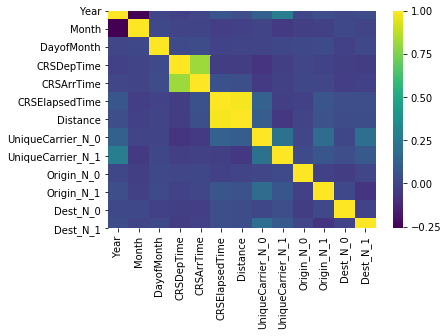

In [26]:
sns.heatmap(X.corr(),cmap='viridis')

In [27]:
cat_att = ['Year','Month','DayofMonth']
#cat_att = ['Year','Month','DayofMonth','UniqueCarrier','Origin','Dest']

In [28]:
cat_att

['Year', 'Month', 'DayofMonth']

In [29]:
cat_transformer = Pipeline(steps=[("onehot", OneHotEncoder(handle_unknown='ignore'))])

In [30]:
from sklearn.compose import ColumnTransformer

In [31]:
preprocessor = ColumnTransformer(transformers=[("cat", cat_transformer, cat_att)])

In [32]:
base_models = [("svm",SVC(C=1.0,class_weight='balanced',probability=True))]

from sklearn.metrics import accuracy_score,confusion_matrix
kfolds = 10
split = KFold(n_splits=kfolds, shuffle=True, random_state=101)


for name, model in base_models:
    model_steps = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)])
    
    # get cross validation score for SVM model:
    cv_results = cross_val_score(model_steps, 
                                 X, y, 
                                 cv=split,
                                 scoring="accuracy")
    # Output:
    min_score = round(min(cv_results), 4)
    max_score = round(max(cv_results), 4)
    mean_score = round(np.mean(cv_results), 4)
    std_dev = round(np.std(cv_results), 4)
    print(f"{name} cross validation accuarcy score: {mean_score} +/- {std_dev} (std) min: {min_score}, max: {max_score}")

/Users/akshay/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/akshay/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/akshay/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/akshay/opt/anaconda3/lib/python3.

svm cross validation accuarcy score: 0.5463 +/- 0.019 (std) min: 0.5133, max: 0.5783


In [36]:
svm = SVC(C=1.0,class_weight='balanced',probability=True)

In [37]:
svm.fit(X_train,y_train)

/Users/akshay/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [38]:
pred_svm = svm.predict(X_test)

In [39]:
pred_svm

array([1, 1, 1, ..., 1, 1, 1])

In [40]:
svm.predict_proba(X_test)[0:10,:]

array([[0.41946231, 0.58053769],
       [0.41946231, 0.58053769],
       [0.41946231, 0.58053769],
       [0.41946231, 0.58053769],
       [0.41946231, 0.58053769],
       [0.41946231, 0.58053769],
       [0.41946231, 0.58053769],
       [0.41946231, 0.58053769],
       [0.41946231, 0.58053769],
       [0.41946231, 0.58053769]])

In [41]:
svm.predict_proba(X_test)[:,0]

array([0.41946231, 0.41946231, 0.41946231, ..., 0.41946231, 0.41946231,
       0.41946231])

In [42]:
y_pred_prob = svm.predict_proba(X_test)[:,0]

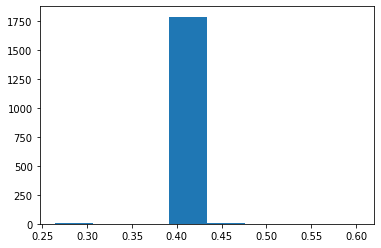

In [43]:
plt.hist(y_pred_prob, bins=8)
plt.show()

In [44]:
from sklearn.preprocessing import binarize

In [45]:
y_pred_class = binarize([y_pred_prob], 0.42313617)[0]

In [46]:
y_pred_prob

array([0.41946231, 0.41946231, 0.41946231, ..., 0.41946231, 0.41946231,
       0.41946231])

In [47]:
y_pred_class

array([0., 0., 0., ..., 0., 0., 0.])

In [48]:
print(confusion_matrix(y_test, y_pred_class))

[[ 763    6]
 [1022    9]]


In [49]:
roc_auc_score(y_test,y_pred_class)

0.5004635241202817

In [50]:
accuracy_score(y_test,y_pred_class)

0.4288888888888889

In [51]:
accuracy_score(y_test, svm.predict(X_test))

0.575

In [52]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [53]:
print(classification_report(y_test,pred_svm))

              precision    recall  f1-score   support

           0       1.00      0.01      0.01       769
           1       0.57      1.00      0.73      1031

    accuracy                           0.57      1800
   macro avg       0.79      0.50      0.37      1800
weighted avg       0.76      0.57      0.42      1800



## Tune Hyperparameters using GridSearchCV and RandomizedSearchCV

In [54]:
import time
from sklearn.model_selection import GridSearchCV

In [55]:
C=[1.0,5.0,10.0,0.1,15.0,20.0,25.0,30.0]
param_grid = dict(C=C)

In [56]:
grid = GridSearchCV(estimator=svm, 
                     param_grid=param_grid, 
                     cv=5,
                     verbose=1, 
                     scoring='accuracy')

start_time = time.time()
grid_result = grid.fit(X, y)
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/akshay/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/akshay/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/akshay/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.

/Users/akshay/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/akshay/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/akshay/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/akshay/opt/anaconda3/lib/python3.

Best: 0.578167 using {'C': 1.0}
Execution time: 222.7373812198639 ms


In [57]:
from sklearn.model_selection import RandomizedSearchCV

In [58]:
random = RandomizedSearchCV(estimator=svm, param_distributions=param_grid, cv = 10, n_jobs= -1)

start_time = time.time()
random_result = random.fit(X, y)
# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

/Users/akshay/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:266: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
/Users/akshay/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Best: 0.578500 using {'C': 1.0}
Execution time: 310.5875930786133 ms


# Oversample the Minority Class using SMOTE Analysis

In [59]:
from imblearn.combine import SMOTETomek

Using TensorFlow backend.
/Users/akshay/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/akshay/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/akshay/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/akshay/opt/anaconda3/lib/python3.7

In [60]:
smk = SMOTETomek(random_state=42)

In [61]:
X_res, y_res = smk.fit_sample(X,y)

In [62]:
X_res.shape,y_res.shape

((5700, 13), (5700,))

In [63]:
from collections import Counter

print('Original Dataset Shape {}'.format(Counter(y)))
print('Resampled Dataset Shape {}'.format(Counter(y_res)))

Original Dataset Shape Counter({1: 3468, 0: 2532})
Resampled Dataset Shape Counter({1: 2850, 0: 2850})


In [64]:
svm = SVC(C=1.0,class_weight='balanced',probability=True)
svm.fit(X_res,y_res)
pred_svm = svm.predict(X_test)

/Users/akshay/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [65]:
class_prob = svm.predict_proba(X_test)

In [67]:
print(confusion_matrix(y_test, pred_svm))

[[ 593  176]
 [   0 1031]]


In [68]:
print(classification_report(y_test, pred_svm))

              precision    recall  f1-score   support

           0       1.00      0.77      0.87       769
           1       0.85      1.00      0.92      1031

    accuracy                           0.90      1800
   macro avg       0.93      0.89      0.90      1800
weighted avg       0.92      0.90      0.90      1800



In [69]:
accuracy_score(y_test, pred_svm)

0.9022222222222223

In [70]:
roc_auc_score(y_test,pred_svm)

0.8855656697009102

In [71]:
df_new = pd.read_excel("unseen_data.xlsx")

In [72]:
df_new['Delays'] = df_new['Delays'].replace(np.nan,"")

In [73]:
df_new.head()

,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,UniqueCarrier,CRSElapsedTime,Origin,Dest,Distance,TaxiIn,Delays
0,2021,3,1,5,845,1035,DL,230,ATL,PHX,1587,9,
1,2021,1,1,1,1515,1657,US,102,ATL,PIT,526,4,
2,2021,2,12,1,815,1029,UA,314,ATL,SFO,2139,6,
3,2021,2,12,1,1810,1955,US,105,ATL,PIT,526,8,
4,2021,1,3,4,1030,1545,WN,195,LAS,MSY,1501,3,


In [74]:
X_new = df_new.drop(['Delays','DayOfWeek','TaxiIn'], axis=1) # Select the desired features

In [75]:
y_new = df_new['Delays'] # Select the desired target variable

In [404]:
pred_new

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [405]:
class_prob_new = svm.predict_proba(X_new)

In [406]:
class_prob_new

array([[0.38467604, 0.61532396],
       [0.38467604, 0.61532396],
       [0.38467604, 0.61532396],
       [0.38467604, 0.61532396],
       [0.38467604, 0.61532396],
       [0.38467604, 0.61532396],
       [0.38467604, 0.61532396],
       [0.38467604, 0.61532396],
       [0.38467604, 0.61532396],
       [0.38467604, 0.61532396],
       [0.38467604, 0.61532396],
       [0.38467604, 0.61532396]])